1. Розробити (в Jupyter-ноутбуках) засоби для обліку сервісів тренажерного центру.
Види сервісів характеризуються за назвою, ідентифікаційним номером та вартістю однієї години тренування.
Відвідувачі характеризуються ідентифікаційним номером, прізвищем, іменем та роком народження. Дані про відвідувачів та сервіси задано окремими текстовими файлами.
Дані про тренування мають формат дата-ідентифікаційний номер відвідувача-номер сервісу-тривалість в годинах, їх задано у кількох (>1) текстових файлах.
2. Вивести:
(а) для кожного відвідувача вартість усіх його тренувань, вказуючи у переліку прізвище та ініціали відвідувача.
(6) Побудувати графік відповідно до попереднього пункту:
(в) для сервісу, обраного за допомогою віджету, щомісячну кількість наданих годин за весь час;
(г) для користувача, обраного з випадаючого списку, визначити кіль кість годин по усіх видах його тренувань за період часу, заданий за допомогою віджетів.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import unittest
from datetime import datetime

### Types

In [2]:
class Service:
    def __init__(self, name, id_service, cost_per_hour):
        self.__name = name
        self.__id_service = id_service
        self.__cost_per_hour = cost_per_hour

    @property
    def name(self):
        return self.__name
    @name.setter
    def name(self, new):
        self.__name = new

    @property
    def id_service(self):
        return self.__id_service
    @id_service.setter
    def id_service(self, new):
        if new < 0:
            raise ValueError('Id must be >= 0')
        self.__id_service = new

    @property
    def cost_per_hour(self):
        return self.__cost_per_hour
    @cost_per_hour.setter
    def cost_per_hour(self, new):
        self.__cost_per_hour = new

In [3]:
class TestServise(unittest.TestCase):
    def setUp(self):
        self.service1 = Service('fitnes', 1, 350)
        self.service2 = Service('coach', 2, 450)

    def test_name(self):
        self.assertEqual(self.service1.name, 'fitnes')
        self.assertEqual(self.service2.name, 'coach')

        self.service1.name = 'test1'
        self.service2.name = 'test2'

        self.assertEqual(self.service1.name, 'test1')
        self.assertEqual(self.service2.name, 'test2')

    def test_id(self):
        self.assertEqual(self.service1.id_service, 1)
        self.assertEqual(self.service2.id_service, 2)

        self.service1.id_service = 3
        self.service2.id_service = 4

        self.assertEqual(self.service1.id_service, 3)
        self.assertEqual(self.service2.id_service, 4)

        with self.assertRaises(ValueError):
           self.service1.id_service = -1

        

In [4]:
unittest.main(argv=[''], exit=False)


..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


In [5]:
class Visitor:
    def __init__(self, id_visitor, last_name, first_name, birthday):
        self.__id_visitor = id_visitor
        self.__last_name = last_name
        self.__first_name = first_name
        self.__birthday = birthday

    @property
    def last_name(self):
        return self.__last_name
    @last_name.setter
    def last_name(self, new):
        self.__last_name = new

    @property
    def first_name(self):
        return self.__first_name
    @first_name.setter
    def first_name(self, new):
        self.__first_name = new

    @property
    def id_visitor(self):
        return self.__id_visitor
    @id_visitor.setter
    def id_visitor(self, new):
        if new < 0:
            raise ValueError('Id must be >= 0')
        self.__id_visitor = new

    @property
    def birthday(self):
        return self.__birthday
    @birthday.setter
    def birthday(self, new):
        self.__birthday = new    

In [6]:
types = pd.read_csv('types.csv', delimiter='-')

In [7]:
visitors = pd.read_csv('visitors.csv', delimiter='-')
visitors['Birthday'] = pd.to_datetime(visitors['Birthday'])

In [8]:
trains1 = pd.read_csv('trains1.csv', delimiter='-')
trains2 = pd.read_csv('trains2.csv', delimiter='-')
trains = pd.concat([trains1, trains2], ignore_index=True)
trains['Date'] = pd.to_datetime(trains['Date'])

In [9]:
all_df = trains.merge(visitors, on='IdVisitor')
all_df = all_df.merge(types, on='IdService')
all_df['TotalCost'] = all_df['CostPerHour'] * all_df['Duration']
all_df['Initial'] = all_df['FirstVisitor'].apply(lambda x: x[0])
all_df['FullName'] = all_df['LastVisitor'] + ' ' + all_df['Initial'] + '.'
all_df

,Date,IdVisitor,IdService,Duration,LastVisitor,FirstVisitor,Birthday,NameService,CostPerHour,TotalCost,Initial,FullName
0,2024-11-27,11,3,2,Dosiak,Svyatoslav,2006-06-05,coach,350,700,S,Dosiak S.
1,2024-11-28,13,2,3,Doe,Petr,1968-07-26,functional train,500,1500,P,Doe P.
2,2024-11-28,12,1,2,Smith,Jane,2008-09-17,fitnes,300,600,J,Smith J.
3,2024-11-29,14,4,4,Stasiv,Taras,2005-06-18,run,200,800,T,Stasiv T.
4,2024-11-29,12,3,5,Smith,Jane,2008-09-17,coach,350,1750,J,Smith J.
5,2024-11-30,13,2,3,Doe,Petr,1968-07-26,functional train,500,1500,P,Doe P.


### task a:

In [10]:
total_cost_visitor = all_df.groupby('FullName')['TotalCost'].sum().reset_index()
total_cost_visitor

,FullName,TotalCost
0,Doe P.,3000
1,Dosiak S.,700
2,Smith J.,2350
3,Stasiv T.,800


### task b:

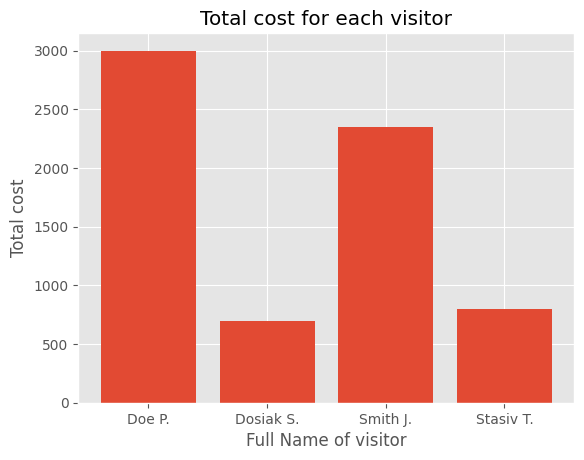

In [11]:
plt.style.use('ggplot')
plt.bar(total_cost_visitor['FullName'], total_cost_visitor['TotalCost'])
plt.xlabel('Full Name of visitor')
plt.ylabel('Total cost')
plt.title('Total cost for each visitor')
plt.show()

### task c:

In [20]:
total_hours_servise = all_df.groupby('NameService')['Duration'].sum()

NameService
coach               7
fitnes              2
functional train    6
run                 4
Name: Duration, dtype: int64

In [13]:
def get_total_hours(name_servise):
    hours = total_hours_servise.loc[name_servise]

    print('Total hours:', hours)

In [14]:
choose_type = widgets.Dropdown(
    descriptions = 'choose',
    options = types['NameService'].unique(),
    value = types['NameService'].iloc[0]
)

In [15]:
widget = widgets.interactive(get_total_hours, name_servise=choose_type)
display(widget)

interactive(children=(Dropdown(description='name_servise', options=('fitnes', 'functional train', 'coach', 'ru…

### task d:

In [21]:
amount_hours_for_visitor = all_df.groupby(['FullName', 'NameService', 'Date'])['Duration'].sum().reset_index()
amount_hours_for_visitor

,FullName,NameService,Date,Duration
0,Doe P.,functional train,2024-11-28,3
1,Doe P.,functional train,2024-11-30,3
2,Dosiak S.,coach,2024-11-27,2
3,Smith J.,coach,2024-11-29,5
4,Smith J.,fitnes,2024-11-28,2
5,Stasiv T.,run,2024-11-29,4


In [17]:
def total_hours_visitor(name_visitor, start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    filt = (amount_hours_for_visitor['Date'] >= start_date) & (amount_hours_for_visitor['Date'] <= end_date)
    filtered_df = amount_hours_for_visitor.loc[filt]

    filtered_df = filtered_df.groupby(['FullName', 'NameService'])['Duration'].sum().reset_index()
    group_df = filtered_df.groupby('FullName')

    if name_visitor not in filtered_df['FullName'].values:
        print('None')
    else:
        total_hours_for_visitor = group_df.get_group(name_visitor)
        display(total_hours_for_visitor)
    

In [18]:
start = widgets.DatePicker(
    descriprion = 'start date',
    value = amount_hours_for_visitor['Date'].min(),
)

end = widgets.DatePicker(
    descriprion = 'end date',
    value = amount_hours_for_visitor['Date'].max(),
)

name_widget = widgets.Dropdown(
    description = 'name',
    options = amount_hours_for_visitor['FullName'].unique(),
    value = amount_hours_for_visitor['FullName'].loc[0]
)

In [19]:
widget = widgets.interactive(total_hours_visitor, name_visitor = name_widget, start_date = start, end_date = end)
display(widget)

interactive(children=(Dropdown(description='name', options=('Doe P.', 'Dosiak S.', 'Smith J.', 'Stasiv T.'), v…